# Data Visualization

> *Exploratory data analysis is an approach to analyzing datasets in order to summarize their main characteristics. One of the ways to accomplish this is through visual methods, which will be the focus of this step.*

In [1]:
# Importing libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Loading the clean csv file.

microdata = pd.read_csv('database/MICRODADOS_ENEM_2021_v2.csv', 
                        sep = ';', 
                        encoding='latin-1')

## Final grades distribution

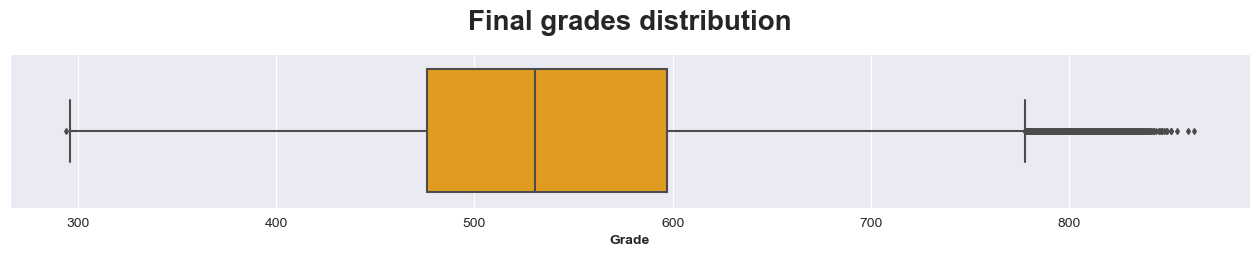

In [3]:
# Creating a boxplot of the final grades distribution.

sns.set_style('darkgrid')

plt.figure(figsize=(16,2))

ax = sns.boxplot(x = microdata['final_grade'], 
                 fliersize = 3, 
                 orient = 'horizontal', 
                 color = 'orange')

ax.set_title('Final grades distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Grade', 
              fontweight = 'bold')

ax = ax

In [4]:
# Calculating some statistics of the final grades distribution.

median = np.median(microdata['final_grade'])
upper_quartile = np.percentile(microdata['final_grade'], 75)
lower_quartile = np.percentile(microdata['final_grade'], 25)

iqr = upper_quartile - lower_quartile
upper_limit = microdata['final_grade'][microdata['final_grade']<=upper_quartile+1.5*iqr].max()
lower_limit = microdata['final_grade'][microdata['final_grade']>=lower_quartile-1.5*iqr].min()

print(f'The median of the final grade is {median.round(2)}.')
print(f'The upper limit of the final grade is {upper_limit}.')
print(f'The lower limit of the final grade is {lower_limit}.')

The median of the final grade is 530.66.
The upper limit of the final grade is 777.86.
The lower limit of the final grade is 296.14.


## Final grades distribution by subject

In [5]:
# Creating a dataframe with only the grades columns.

grades = pd.DataFrame(microdata, 
                      columns = ['natural_sciences_grade', 
                                 'human_sciences_grade', 
                                 'languages_grade', 
                                 'mathematics_grade', 
                                 'essay_grade'])

grades.rename(columns = {'natural_sciences_grade': 'Natural Sciences', 
                         'human_sciences_grade': 'Human Sciences', 
                         'languages_grade': 'Languages', 
                         'mathematics_grade': 'Mathematics', 
                         'essay_grade': 'Essay'},
             inplace = True)

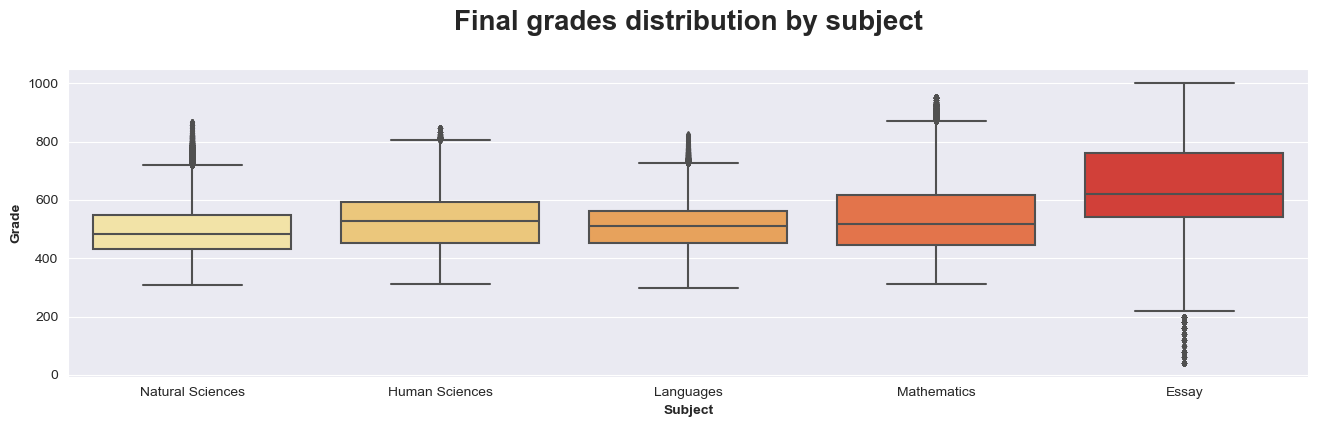

In [6]:
# Creating boxplots of the final grades distribution by subject.

sns.set_palette('YlOrRd')

plt.figure(figsize=(16,4))

ax = sns.boxplot(data = grades, 
                 fliersize = 3)

ax.set_title('Final grades distribution by subject', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_ylabel('Grade', 
              fontweight = 'bold')

ax.set_xlabel('Subject', 
              fontweight = 'bold')

ax = ax

In essay, the median was greater than other subjects, as well it was the upper limit. On the other hand, it was the subject with the lowest lower limit and the one with the most outliers below the lower limit, which means that the grades were distributed in a less concentrated way.

Natural Sciences was the subject with the lowest median, as well as the lowest upper bound.

## Median final grades by state

In [7]:
# Creating a dataframe with the geolocation of the states.

ufs = gpd.read_file('database/bcim_2016_21_11_2018.gpkg', 
                    layer = 'lim_unidade_federacao_a')

ufs.rename({'sigla': 'state'}, 
           axis = 1, 
           inplace = True)

ufs = ufs[['state', 'geometry']]

In [8]:
# Creating a dataframe with the median of the final grades by state.

microdata_median = microdata[['state', 'final_grade']].groupby(['state']).median()

In [9]:
# Merging the two dataframes created.

microdata_median = ufs.merge(microdata_median, 
                             on = 'state', 
                             how = 'left')

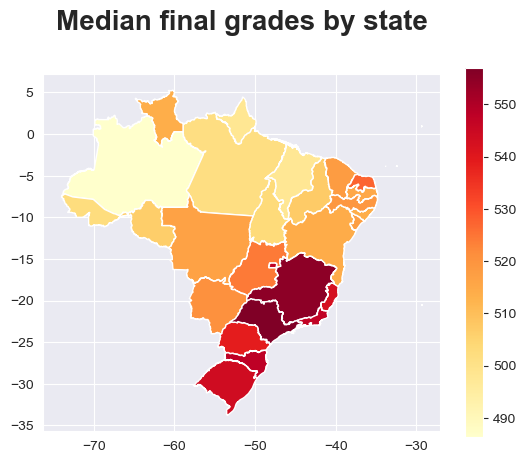

In [10]:
# Creating a geospatial data visualization.

fig, ax = plt.subplots(1, 1)

microdata_median.plot(column = 'final_grade',
                   legend = True,
                   ax = ax,
                   legend_kwds={'orientation': "vertical"},
                   cmap = 'YlOrRd')

ax.set_title('Median final grades by state', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax = ax

The southeast and south were the regions with the greater medians of final grades in ENEM. 

The lowest median grades occured in the northern region.

## Final grades distribution by gender

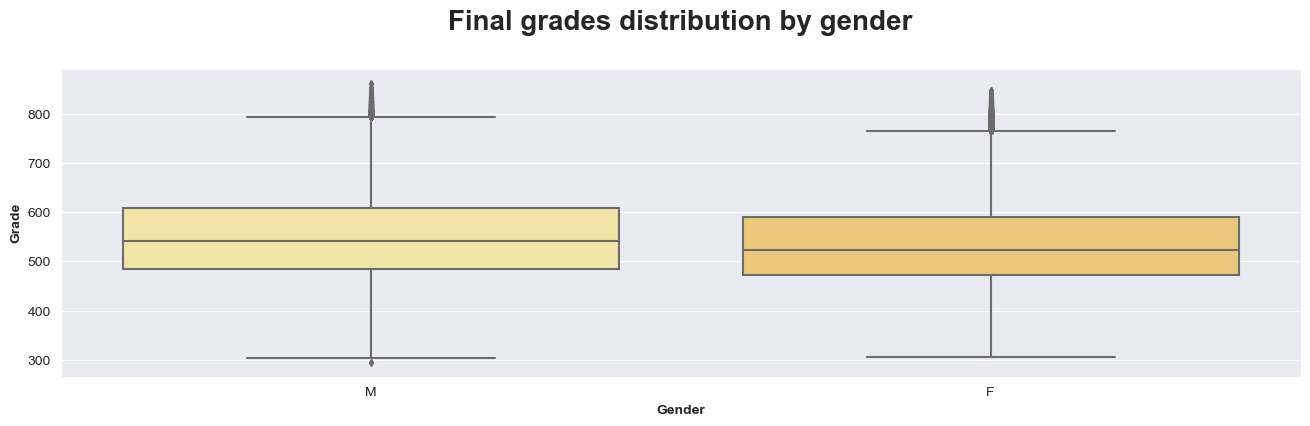

In [11]:
# Creating boxplots of the final grades distribution by gender.

plt.figure(figsize=(16,4))

ax = sns.boxplot(x = 'gender', 
                 y = 'final_grade', 
                 data = microdata, 
                 fliersize = 3)

ax.set_title('Final grades distribution by gender', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_ylabel('Grade', 
              fontweight = 'bold')

ax.set_xlabel('Gender', 
              fontweight = 'bold')

ax = ax

The median final grade of male participants was greater than the median final grade of female participants.

We can make the same analysis but grouping by subject to check if the same thing occours in all subjects.

In [12]:
# Creating a dataset of the genders and the grades.

df_long = microdata.loc[:, ['gender',
                    'natural_sciences_grade',
                    'human_sciences_grade', 
                    'languages_grade', 
                    'mathematics_grade', 
                    'essay_grade']]

df_long.rename(columns = {'natural_sciences_grade': 'Natural Sciences', 
                         'human_sciences_grade': 'Human Sciences', 
                         'languages_grade': 'Languages', 
                         'mathematics_grade': 'Mathematics', 
                         'essay_grade': 'Essay'},
             inplace = True)

In [13]:
# Melting the dataset created.

df_long = pd.melt(df_long,
                  'gender',
                  var_name = 'subject')

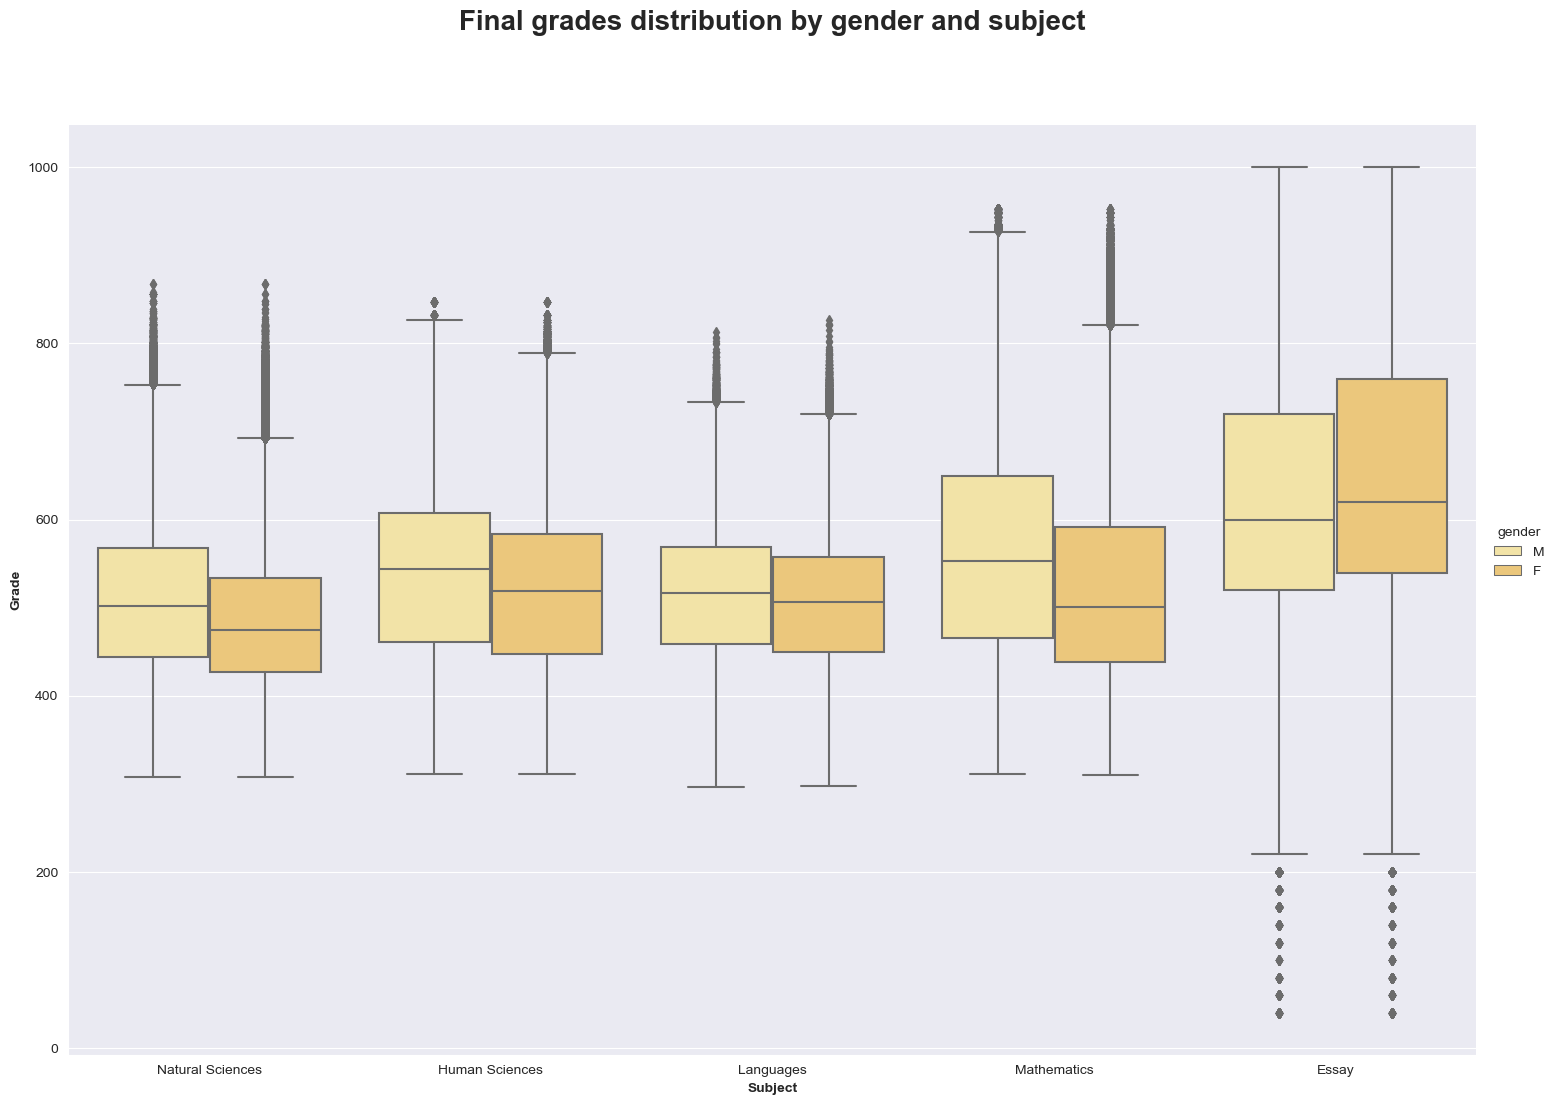

In [14]:
# Creating boxplots of the final grades distribution by gender and subjects.

ax = sns.catplot(x = 'subject', 
            hue = 'gender', 
            y = "value", 
            data = df_long,
            kind = "box",
            height = 10, 
            aspect = 1.5)

ax.fig.suptitle('Final grades distribution by gender and subject',
               fontweight = 'bold', 
               fontsize = 20,
               y = 1.1)

ax.set_xlabels('Subject',
                  fontweight = 'bold')

ax.set_ylabels('Grade',
                  fontweight = 'bold')

ax = ax.fig

Seems like there was one subject that the median grade of the female students was greater than the one from male students: the essay.

## Final grades distribution by type of school

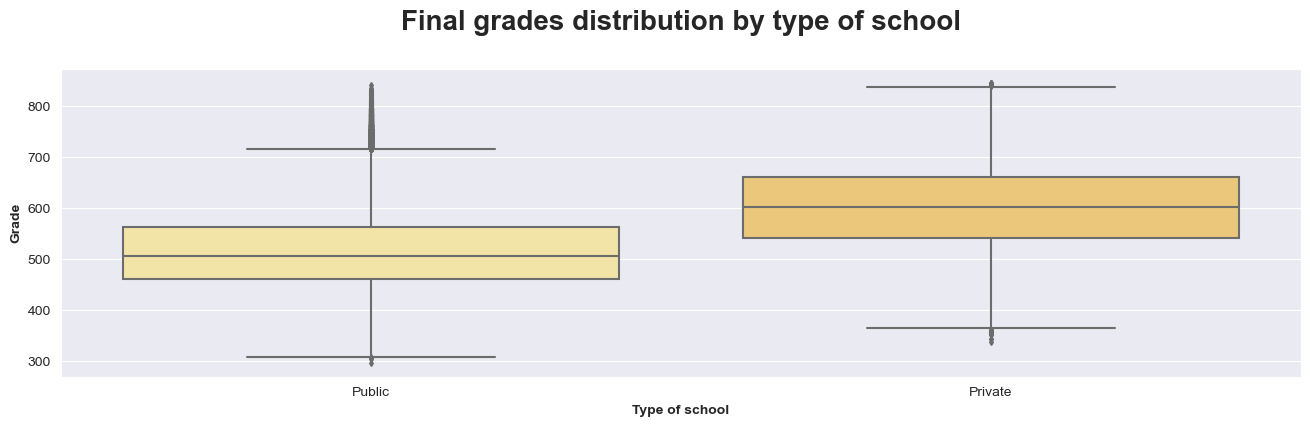

In [15]:
# Creating boxplots of the final grades distribution by type of school.

plt.figure(figsize=(16,4))

ax = sns.boxplot(x = 'school', 
                 y = 'final_grade', 
                 data = microdata.query('school != "Did not answer"'),
                 fliersize = 3)

ax.set_title('Final grades distribution by type of school', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_ylabel('Grade', 
              fontweight = 'bold')

ax.set_xlabel('Type of school', 
              fontweight = 'bold')

ax = ax

The median grade of private school students was greater than the median grade of public school students.

## Final grades distribution by income

In [16]:
# Creating a dataframe with the median final grades by income.

microdata_median = microdata[['income', 'final_grade']].groupby(['income']).median().sort_values('final_grade').reset_index()


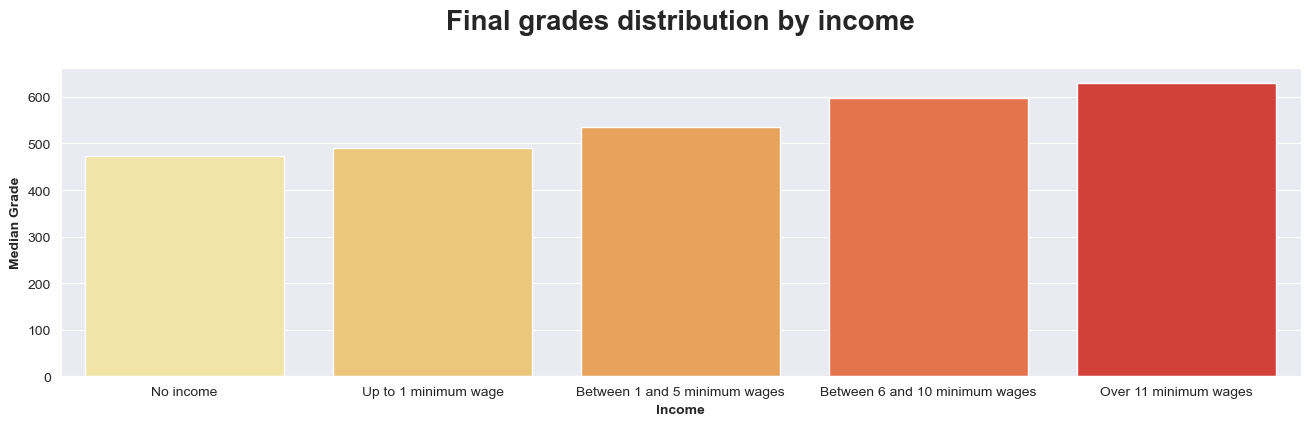

In [17]:
# Creating barplots of the final grades distribution by income.

plt.figure(figsize=(16,4))

ax = sns.barplot(x = 'income', 
                 y = 'final_grade', 
                 data = microdata_median)

ax.set_title('Final grades distribution by income', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Income', 
              fontweight = 'bold')

ax.set_ylabel('Median Grade', 
              fontweight = 'bold')

ax = ax

It seems that the greater the income, the greater the grade achieved in the ENEM, probably due to the greater study opportunities.

## Final grades distribution by age group

In [18]:
# Creating a dataframe with the median final grades by age group.

microdata_median = microdata[['age', 'final_grade']].groupby(['age']).median().sort_values('final_grade').reset_index()

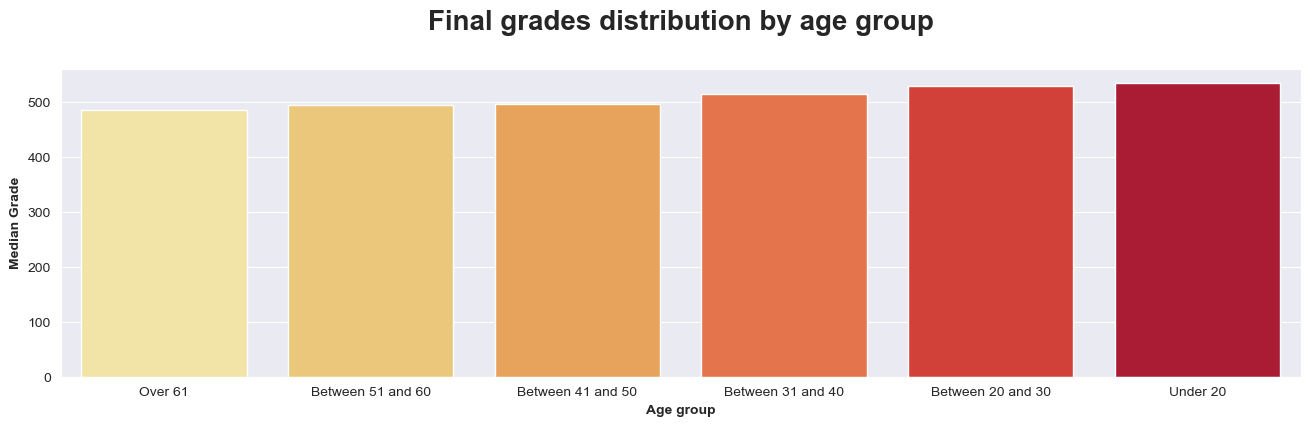

In [19]:
# Creating barplots of the final grades distribution by age group.

plt.figure(figsize=(16,4))

ax = sns.barplot(x = 'age', 
                 y = 'final_grade', 
                 data = microdata_median)

ax.set_title('Final grades distribution by age group', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Age group', 
              fontweight = 'bold')

ax.set_ylabel('Median Grade', 
              fontweight = 'bold')

ax = ax

Younger students achieved greater median grades.

## Conclusion

Just by viewing the graphs, we can draw some initial conclusions:

- The median of the final grade is around 530 points.
- Essay has the greater but also the lowest grades.
- Natural Sciences is the subject with the lowest median grade.
- The south and southeast region has the greater grades, and the north region the lowest.
- Men score greater than women when we analyze the median of the two groups, except for the essay.
- Private school students have greater median final grades than public school students.
- The greater the income, the greater the median final grade achieved in the ENEM.
- Younger students achieved greater median grades.

Although it was simple to draw these conclusions from the graphs, as we are working with a sample, we need to see if these differences are statistically significant to extend the conclusions to the population. This will be done in the next step.